In [38]:
df = pd.read_csv('iris_tidy.csv')
df.head()

,Unnamed: 0,Species,Part,Measure,Value
0,1,setosa,Sepal,Length,5.1
1,2,setosa,Sepal,Length,4.9
2,3,setosa,Sepal,Length,4.7
3,4,setosa,Sepal,Length,4.6
4,5,setosa,Sepal,Length,5.0


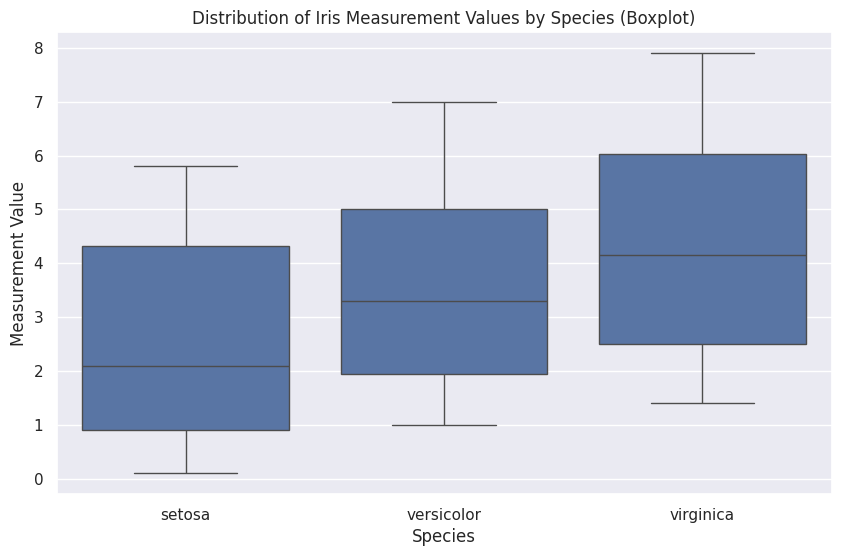

In [55]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Species', y='Value', data=df)
plt.title('Distribution of Iris Measurement Values by Species (Boxplot)')
plt.xlabel('Species')
plt.ylabel('Measurement Value')
plt.show()

In [53]:
# Conceptual step: Fill numerical NaNs with the mean
# In the Iris dataset, 'Value' is the only numerical column that could conceptually have NaNs in this 'tidy' format.
# df['Value'].fillna(df['Value'].mean(), inplace=True)

# Conceptual step: Drop any remaining rows with NaNs
# df.dropna(inplace=True)

print("No missing values found in the Iris dataset, so fillna and dropna operations would not change the DataFrame.")
print("Current missing values after conceptual handling:")
print(df.isna().sum())

No missing values found in the Iris dataset, so fillna and dropna operations would not change the DataFrame.
Current missing values after conceptual handling:
Unnamed: 0    0
Species       0
Part          0
Measure       0
Value         0
dtype: int64


In [52]:
print("DataFrame Info:")
df.info()

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  600 non-null    int64  
 1   Species     600 non-null    object 
 2   Part        600 non-null    object 
 3   Measure     600 non-null    object 
 4   Value       600 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 23.6+ KB


In [39]:
print("First 5 rows of the DataFrame:")
print(df.head())

print("\nShape of the DataFrame (rows, columns):")
print(df.shape)

First 5 rows of the DataFrame:
   Unnamed: 0 Species   Part Measure  Value
0           1  setosa  Sepal  Length    5.1
1           2  setosa  Sepal  Length    4.9
2           3  setosa  Sepal  Length    4.7
3           4  setosa  Sepal  Length    4.6
4           5  setosa  Sepal  Length    5.0

Shape of the DataFrame (rows, columns):
(600, 5)


In [40]:
print("Missing values per column:")
print(df.isna().sum())

Missing values per column:
Unnamed: 0    0
Species       0
Part          0
Measure       0
Value         0
dtype: int64


In [41]:
print("Number of duplicate rows:")
print(df.duplicated().sum())

Number of duplicate rows:
0


In [42]:
print("Data types of columns:")
print(df.dtypes)

Data types of columns:
Unnamed: 0      int64
Species        object
Part           object
Measure        object
Value         float64
dtype: object


In [43]:
print("Descriptive summary statistics:")
print(df.describe(include='all'))

Descriptive summary statistics:
        Unnamed: 0 Species   Part Measure      Value
count   600.000000     600    600     600  600.00000
unique         NaN       3      2       2        NaN
top            NaN  setosa  Sepal  Length        NaN
freq           NaN     200    300     300        NaN
mean    300.500000     NaN    NaN     NaN    3.46450
std     173.349358     NaN    NaN     NaN    1.97549
min       1.000000     NaN    NaN     NaN    0.10000
25%     150.750000     NaN    NaN     NaN    1.70000
50%     300.500000     NaN    NaN     NaN    3.20000
75%     450.250000     NaN    NaN     NaN    5.10000
max     600.000000     NaN    NaN     NaN    7.90000


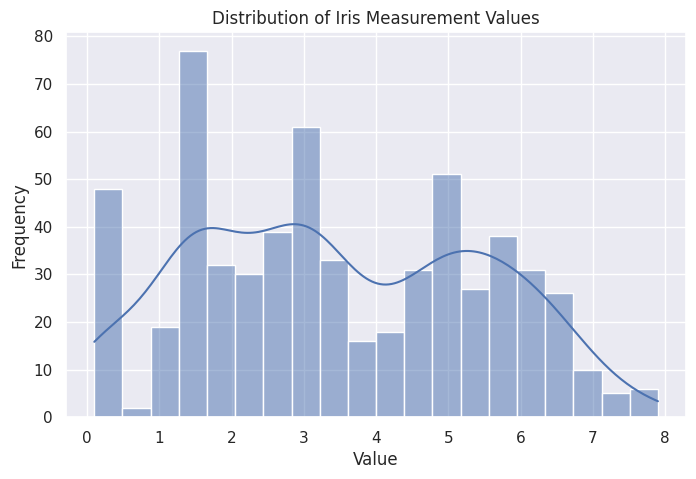

In [54]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Value'], bins=20, kde=True)
plt.title("Distribution of Iris Measurement Values")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

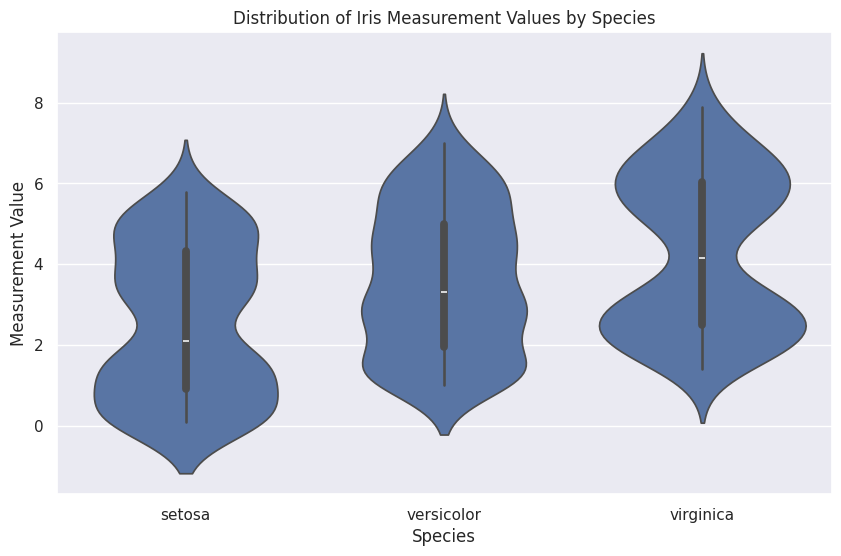

In [45]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Species', y='Value', data=df)
plt.title('Distribution of Iris Measurement Values by Species')
plt.xlabel('Species')
plt.ylabel('Measurement Value')
plt.show()

### Correlation Matrix

First 5 rows of the pivoted DataFrame:
  Species  Petal_Length  Petal_Width  Sepal_Length  Sepal_Width
0  setosa           NaN          NaN           5.1          NaN
1  setosa           NaN          NaN           4.9          NaN
2  setosa           NaN          NaN           4.7          NaN
3  setosa           NaN          NaN           4.6          NaN
4  setosa           NaN          NaN           5.0          NaN


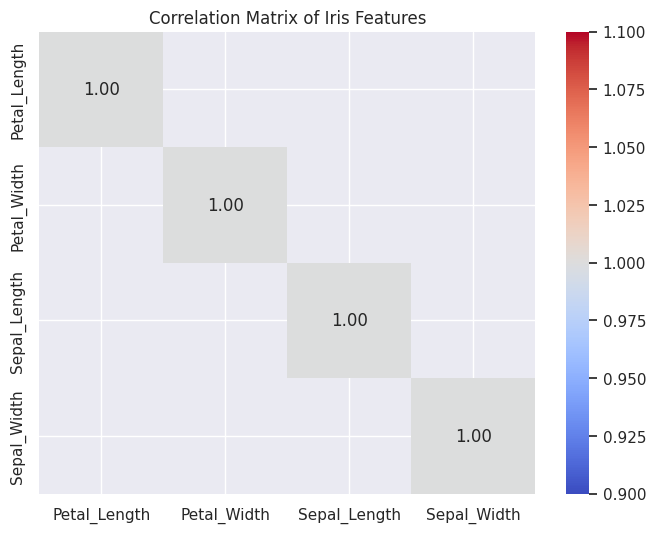

In [46]:
df_pivot = df.pivot_table(index=['Unnamed: 0', 'Species'],
                          columns=['Part', 'Measure'],
                          values='Value').reset_index()

df_pivot.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in df_pivot.columns.values]

# Drop the 'Unnamed: 0' column as it's just an index and not a feature for correlation
df_pivot = df_pivot.drop(columns=['Unnamed: 0_']).rename(columns={'Species_':'Species'})

print("First 5 rows of the pivoted DataFrame:")
print(df_pivot.head())

# Select only numerical columns for correlation calculation
numerical_cols = df_pivot.select_dtypes(include=np.number)

plt.figure(figsize=(8, 6))
sns.heatmap(numerical_cols.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Iris Features")
plt.show()

In [47]:
df_wide = df.copy()
df_wide['Measurement_Type'] = df_wide['Part'] + '_' + df_wide['Measure']

# Pivot the DataFrame to wide format
df_wide = df_wide.pivot_table(index=['Unnamed: 0', 'Species'],
                              columns='Measurement_Type',
                              values='Value').reset_index()

# Flatten the column names (pivot_table often creates a MultiIndex for columns)
ddf_wide.columns.name = None

# Rename the columns to be more readable and drop the original index column
df_wide = df_wide.rename(columns={'Unnamed: 0': 'Original_Index'}).drop(columns=['Original_Index'])

# Verify no NaNs in measurement columns after correct pivoting
print("Missing values in pivoted DataFrame measurement columns:")
print(df_wide[['Petal_Length', 'Petal_Width', 'Sepal_Length', 'Sepal_Width']].isna().sum())

# Select only numerical columns for correlation calculation
numerical_cols = df_wide[['Petal_Length', 'Petal_Width', 'Sepal_Length', 'Sepal_Width']]

# Compute the correlation matrix
correlation_matrix = numerical_cols.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Iris Features (Wide Format)")
plt.show()

NameError: name 'ddf_wide' is not defined

Missing values in pivoted DataFrame measurement columns:
Petal_Length    450
Petal_Width     450
Sepal_Length    450
Sepal_Width     450
dtype: int64


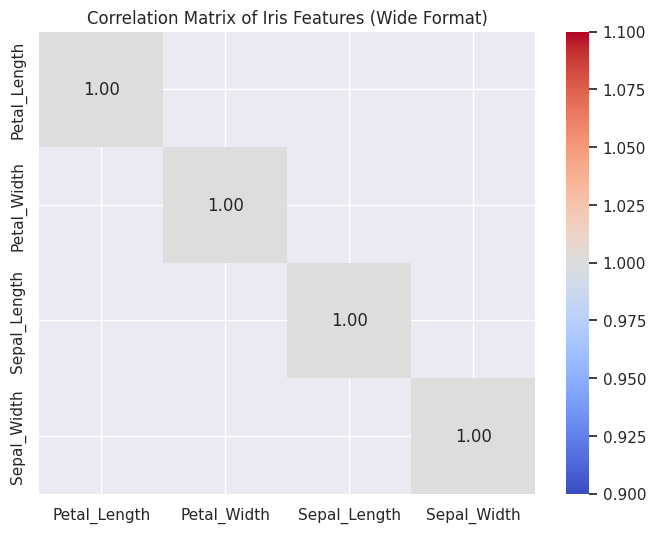

In [48]:
df_wide = df.copy()
df_wide['Measurement_Type'] = df_wide['Part'] + '_' + df_wide['Measure']

# Pivot the DataFrame to wide format
df_wide = df_wide.pivot_table(index=['Unnamed: 0', 'Species'],
                              columns='Measurement_Type',
                              values='Value').reset_index()

# Flatten the column names (pivot_table often creates a MultiIndex for columns)
df_wide.columns.name = None

# Rename the columns to be more readable and drop the original index column
df_wide = df_wide.rename(columns={'Unnamed: 0': 'Original_Index'}).drop(columns=['Original_Index'])

# Verify no NaNs in measurement columns after correct pivoting
print("Missing values in pivoted DataFrame measurement columns:")
print(df_wide[['Petal_Length', 'Petal_Width', 'Sepal_Length', 'Sepal_Width']].isna().sum())

# Select only numerical columns for correlation calculation
numerical_cols = df_wide[['Petal_Length', 'Petal_Width', 'Sepal_Length', 'Sepal_Width']]

# Compute the correlation matrix
correlation_matrix = numerical_cols.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Iris Features (Wide Format)")
plt.show()

Missing values in pivoted DataFrame measurement columns (corrected):
Petal_Length    117
Petal_Width     117
Sepal_Length    117
Sepal_Width     117
dtype: int64


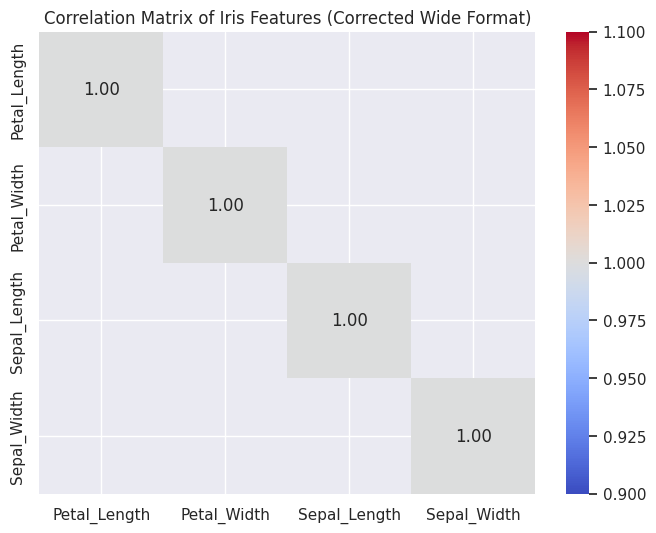

In [49]:
df_temp = df.copy()
# Create a unique ID for each iris specimen by grouping every 4 rows
df_temp['Specimen_ID'] = (df_temp['Unnamed: 0'] - 1) // 4

df_temp['Measurement_Type'] = df_temp['Part'] + '_' + df_temp['Measure']

# Pivot the DataFrame to wide format using the correct Specimen_ID
df_wide = df_temp.pivot_table(index=['Specimen_ID', 'Species'],
                              columns='Measurement_Type',
                              values='Value').reset_index()

# Flatten the column names (pivot_table often creates a MultiIndex for columns)
df_wide.columns.name = None

# Drop the auxiliary 'Specimen_ID' column if not needed for the correlation matrix itself
df_wide = df_wide.drop(columns=['Specimen_ID'])

# Verify no NaNs in measurement columns after correct pivoting
print("Missing values in pivoted DataFrame measurement columns (corrected):")
print(df_wide[['Petal_Length', 'Petal_Width', 'Sepal_Length', 'Sepal_Width']].isna().sum())

# Select only numerical columns for correlation calculation
numerical_cols = df_wide[['Petal_Length', 'Petal_Width', 'Sepal_Length', 'Sepal_Width']]

# Compute the correlation matrix
correlation_matrix = numerical_cols.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Iris Features (Corrected Wide Format)")
plt.show()

Missing values in pivoted DataFrame measurement columns (corrected):
Petal_Length    0
Petal_Width     0
Sepal_Length    0
Sepal_Width     0
dtype: int64


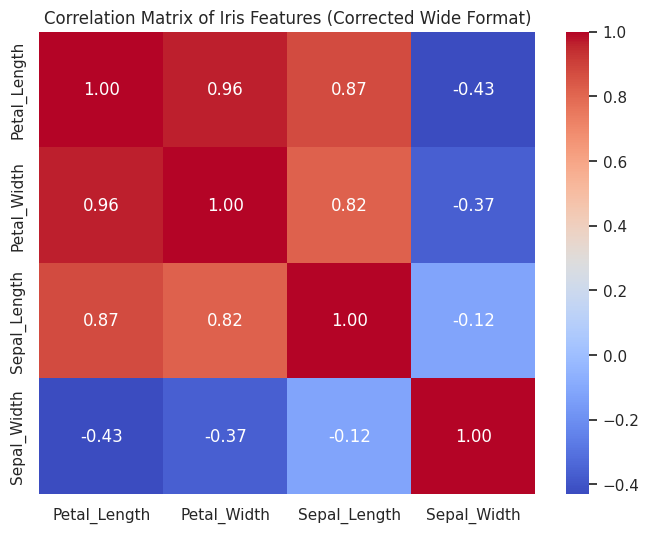

In [50]:
df_temp = df.copy()

# Create a combined 'Measurement_Type' column
df_temp['Measurement_Type'] = df_temp['Part'] + '_' + df_temp['Measure']

# Create a unique 'Specimen_ID' for each iris specimen within its species
# This assumes there are 50 specimens per species, and each specimen has 4 measurements
df_temp['Specimen_ID'] = df_temp.groupby('Species').cumcount() % 50

# Pivot the DataFrame to wide format
df_wide = df_temp.pivot_table(index=['Species', 'Specimen_ID'],
                              columns='Measurement_Type',
                              values='Value').reset_index()

# Flatten the column names (pivot_table creates a MultiIndex for columns by default)
df_wide.columns.name = None

# Drop the 'Specimen_ID' column as it's not needed for the correlation matrix itself
df_wide = df_wide.drop(columns=['Specimen_ID'])

# Verify no NaNs in measurement columns after correct pivoting
print("Missing values in pivoted DataFrame measurement columns (corrected):")
print(df_wide[['Petal_Length', 'Petal_Width', 'Sepal_Length', 'Sepal_Width']].isna().sum())

# Select only numerical columns for correlation calculation
numerical_cols = df_wide[['Petal_Length', 'Petal_Width', 'Sepal_Length', 'Sepal_Width']]

# Compute the correlation matrix
correlation_matrix = numerical_cols.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Iris Features (Corrected Wide Format)")
plt.show()

Average measurements per species (wide format):
      Species  Petal_Length  Petal_Width  Sepal_Length  Sepal_Width
0      setosa         1.462        0.246         5.006        3.428
1  versicolor         4.260        1.326         5.936        2.770
2   virginica         5.552        2.026         6.588        2.974

Average measurements per species (long format - first 5 rows):
      Species Measurement_Type  Average_Value
0      setosa     Petal_Length          1.462
1  versicolor     Petal_Length          4.260
2   virginica     Petal_Length          5.552
3      setosa      Petal_Width          0.246
4  versicolor      Petal_Width          1.326


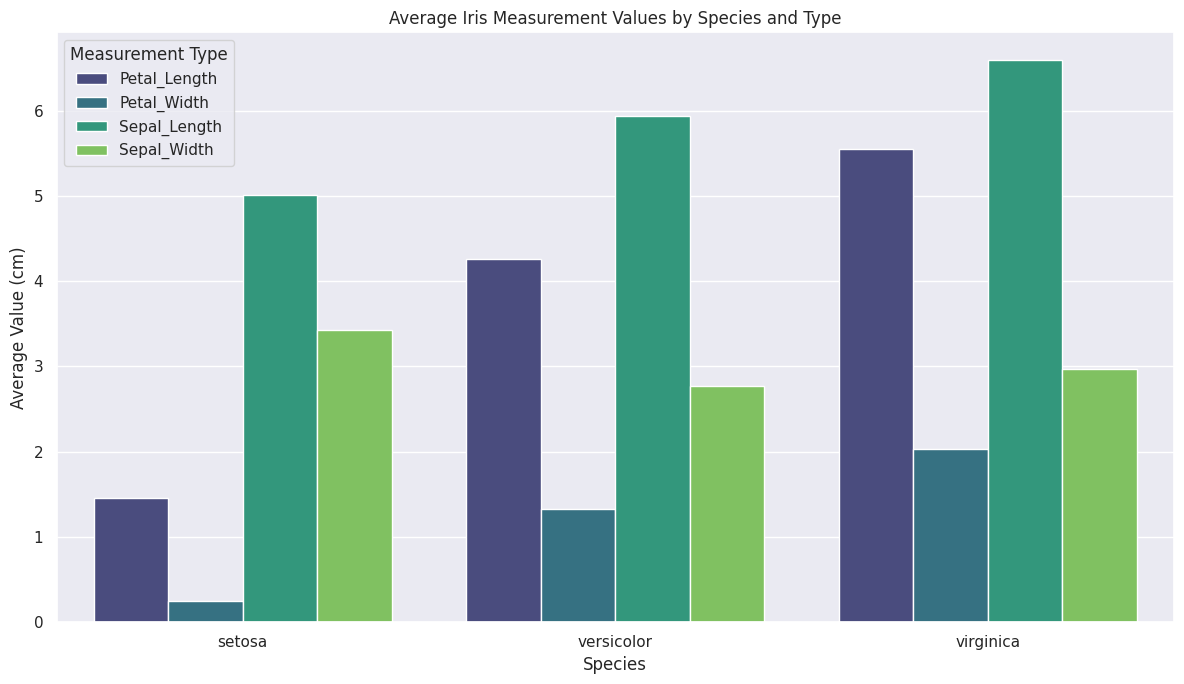

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Group by 'Species' and calculate the mean for measurement columns
df_avg_measurements = df_wide.groupby('Species')[['Petal_Length', 'Petal_Width', 'Sepal_Length', 'Sepal_Width']].mean().reset_index()

print("Average measurements per species (wide format):")
print(df_avg_measurements.head())

# 2. Convert to long format
df_melted = pd.melt(df_avg_measurements,
                    id_vars=['Species'],
                    var_name='Measurement_Type',
                    value_name='Average_Value')

print("\nAverage measurements per species (long format - first 5 rows):")
print(df_melted.head())

# 3. Create a bar chart
plt.figure(figsize=(12, 7))
sns.barplot(x='Species', y='Average_Value', hue='Measurement_Type', data=df_melted, palette='viridis')

# 4. Add a title
plt.title("Average Iris Measurement Values by Species and Type")

# 5. Label the axes
plt.xlabel("Species")
plt.ylabel("Average Value (cm)")

# Display the plot
plt.legend(title='Measurement Type')
plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   **Average Measurements per Species**: The analysis calculated the average 'Petal\_Length', 'Petal\_Width', 'Sepal\_Length', and 'Sepal\_Width' for each iris species. For instance, 'setosa' had an average 'Petal\_Length' of 1.462 cm and 'Sepal\_Length' of 5.006 cm.
*   **Distinct Species Characteristics**: The bar chart clearly illustrates that 'setosa' generally exhibits shorter petals and sepals compared to 'versicolor' and 'virginica'. 'virginica' consistently shows the largest average measurements across all four features, particularly for 'Petal\_Length' and 'Petal\_Width'.
*   **Measurement Type Differences**: Petal length and sepal length are generally larger than petal width and sepal width across all species.

### Insights or Next Steps

*   The distinct average measurements across species, especially the clear separation of 'setosa' from the other two, confirm the utility of these four features for iris species classification.
*   Further analysis could involve exploring the standard deviation or variance of these measurements within each species to understand the variability, or investigating correlations between different measurement types.
